In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch_geometric as tg
from torch_geometric.data import DataLoader
import scipy.io as sio
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

from dataset import Dataset, Graph

In [2]:
dataset = tg.datasets.PPI(root='data')
num_nodes = dataset.data.num_nodes
num_edges = dataset.data.num_edges // 2
num_features = dataset.num_node_features
num_classes = dataset.num_classes

print("num_graphs:", len(dataset))
print("num_nodes:", num_nodes)
print("num_edges:", num_edges)
print("num_features:", num_features)
print("num_classes:", num_classes)

data = dataset[0]   # Get the one graph in the Cora dataset
tg.utils.is_undirected(data.edge_index)

print(len(dataset))
print(data.edge_index.shape)
print(data.x.shape)
print(data.y.shape)
data.edge_index

num_graphs: 20
num_nodes: 44906
num_edges: 613184
num_features: 50
num_classes: 121
20
torch.Size([2, 32318])
torch.Size([1767, 50])
torch.Size([1767, 121])


c:\Users\jonas\miniconda3\envs\OxPracticals\Lib\site-packages\torch_geometric\data\in_memory_dataset.py:301: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


tensor([[   0,    0,    0,  ..., 1744, 1745, 1749],
        [ 372, 1101,  766,  ..., 1745, 1744, 1739]])

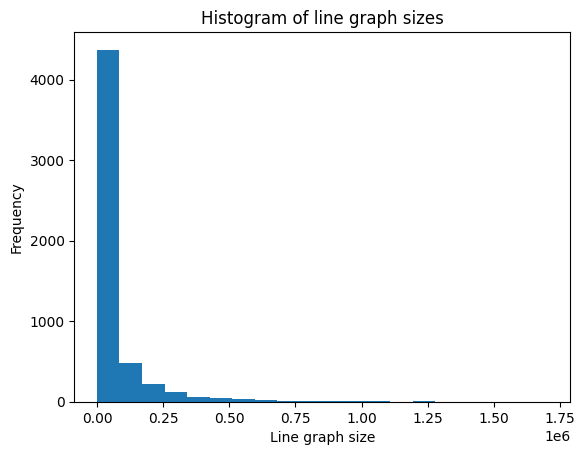

In [3]:
dataset = Dataset("data/PPIDataset")

line_graph_sizes = [graph.line_edge_index.shape[1] for graph in dataset.train_graphs]

# Create a histogram of line graph sizes
plt.hist(line_graph_sizes, bins=20)
plt.xlabel('Line graph size')
plt.ylabel('Frequency')
plt.title('Histogram of line graph sizes')
plt.show()


In [4]:
print(num_nodes)
tg.utils.num_nodes.maybe_num_nodes(data.edge_index, num_nodes=len(data.x))

44906


1767

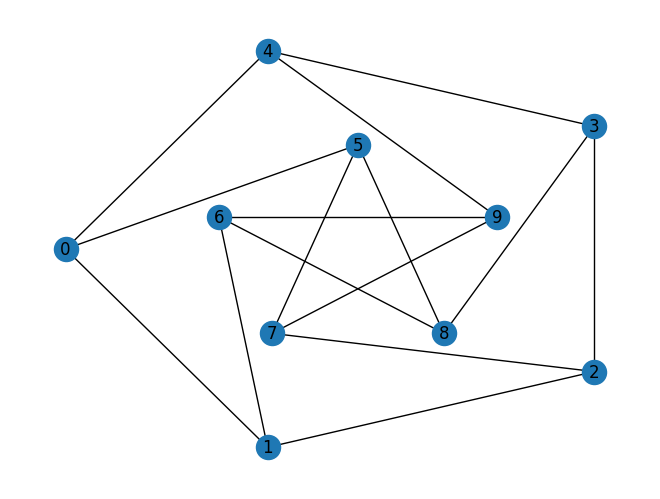

tensor([[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7,
         8, 8, 8, 9, 9, 9],
        [1, 4, 5, 0, 2, 6, 1, 3, 7, 2, 4, 8, 0, 3, 9, 0, 7, 8, 1, 8, 9, 2, 5, 9,
         3, 5, 6, 4, 6, 7]])
tensor([[0., 0.],
        [1., 1.],
        [2., 2.],
        [3., 3.],
        [4., 4.],
        [5., 5.],
        [6., 6.],
        [7., 7.],
        [8., 8.],
        [9., 9.]])


In [5]:
import networkx as nx
# Petersen graph to test on

G = nx.petersen_graph()
data = tg.utils.from_networkx(G)

# Display the graph
nx.draw_shell(G, nlist=[range(5,10), range(5)], with_labels=True)
plt.show()


print(data.edge_index)
data.x = torch.arange(data.num_nodes).view(-1, 1).float()
data.x = torch.cat([data.x, data.x], dim=-1)
print(data.x)

In [6]:
from utils import subgraph_extraction, sort_for_unique_edges, to_line_graph